In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [70]:
# Load Dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\country_wise_latest.csv")

In [71]:
# Selecting relevant numerical features and target variable 'Active'
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'New cases', 'New deaths', 'New recovered']
X = df[numerical_features]
y = df['Active']


In [72]:
# Convert target variable into binary classification
y_binary = (y >= np.median(y)).astype(int)

In [73]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [74]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

In [75]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

LINEAR REGRESSION MODEL

Linear Regression Results:
Accuracy: 100.00%
Mean Squared Error: 0.00%
R-squared Score: 100.00%
Confusion Matrix:
[[19  0]
 [ 0 19]]


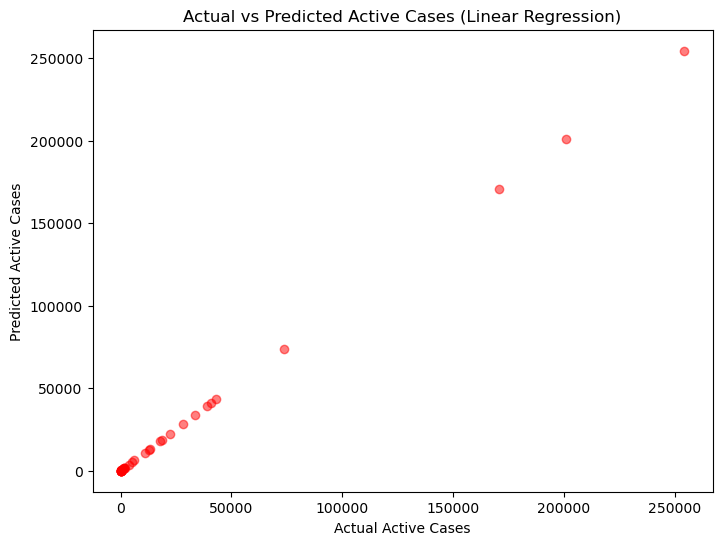

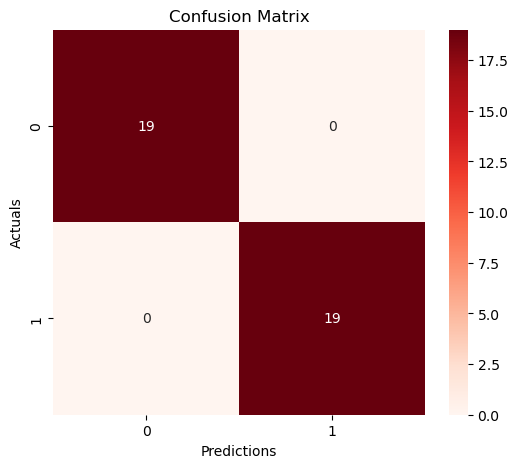

In [76]:
# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

# Convert predictions to binary values for confusion matrix
threshold = np.median(y_test)
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

# Metrics
lin_mse = mean_squared_error(y_test, y_pred)
lin_r2 = r2_score(y_test, y_pred)
lin_cm = confusion_matrix(y_test_binary, y_pred_binary)
lin_accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Linear Regression Results:")
print(f"Accuracy: {lin_accuracy*100:.2f}%")
print(f"Mean Squared Error: {lin_mse*100:.2f}%")
print(f"R-squared Score: {lin_r2*100:.2f}%")
print("Confusion Matrix:")
print(lin_cm)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.xlabel("Actual Active Cases")
plt.ylabel("Predicted Active Cases")
plt.title("Actual vs Predicted Active Cases (Linear Regression)")
plt.show()

# Plot Confusion Matrix in the specified format
plt.figure(figsize=(6, 5))
sns.heatmap(lin_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()


LOGISTIC REGRESSION MODEL


Logistic Regression Results:
Accuracy: 92.11%
Precision: 94.44%
Recall: 89.47%
F1 Score: 91.89%
Confusion Matrix:
[[18  1]
 [ 2 17]]


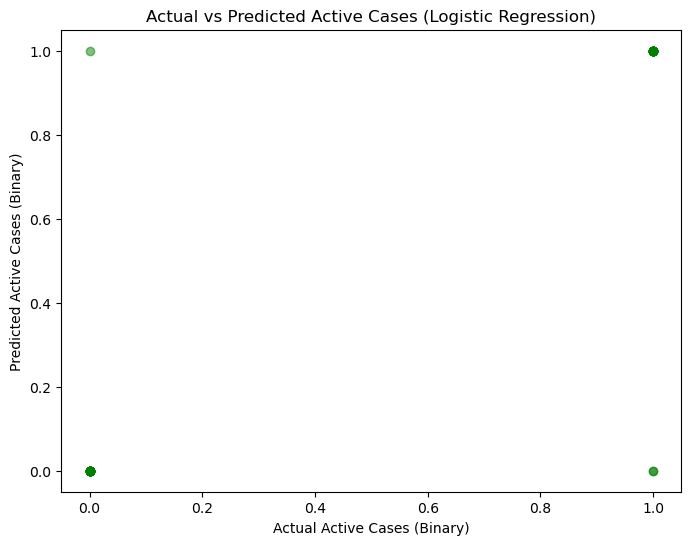

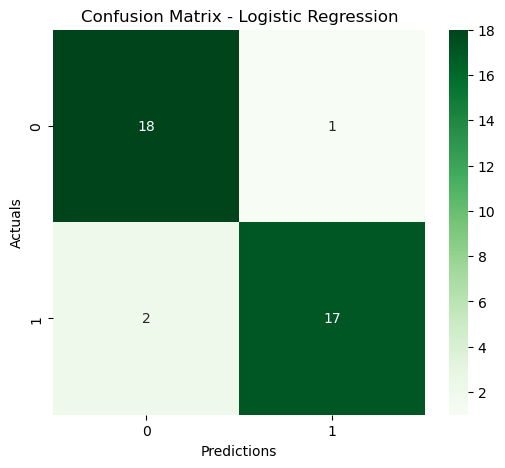

In [77]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_bin, y_train_bin)
y_pred_log = log_model.predict(X_test_bin)

# Metrics for Logistic Regression
log_cm = confusion_matrix(y_test_bin, y_pred_log)
log_accuracy = accuracy_score(y_test_bin, y_pred_log)
log_precision = precision_score(y_test_bin, y_pred_log)
log_recall = recall_score(y_test_bin, y_pred_log)
log_f1 = f1_score(y_test_bin, y_pred_log)

print(f"Logistic Regression Results:")
print(f"Accuracy: {log_accuracy*100:.2f}%")
print(f"Precision: {log_precision*100:.2f}%")
print(f"Recall: {log_recall*100:.2f}%")
print(f"F1 Score: {log_f1*100:.2f}%")
print("Confusion Matrix:")
print(log_cm)

# Logistic Regression Plot
y_pred_log = log_model.predict(X_test_bin)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_bin, y_pred_log, color='green', alpha=0.5)
plt.xlabel("Actual Active Cases (Binary)")
plt.ylabel("Predicted Active Cases (Binary)")
plt.title("Actual vs Predicted Active Cases (Logistic Regression)")
plt.show()

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()




SUPPORT VECTOR MACHINE MODEL

SVM Results:
Accuracy: 92.11%
Precision: 100.00%
Recall: 84.21%
F1 Score: 91.43%
Confusion Matrix:
[[19  0]
 [ 3 16]]


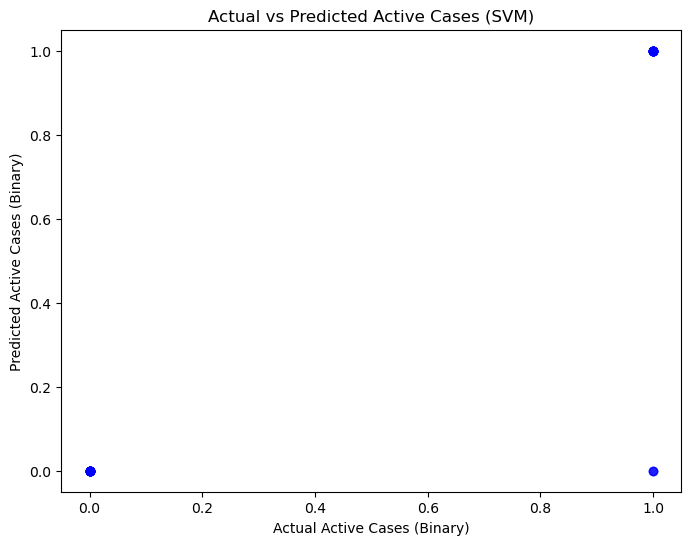

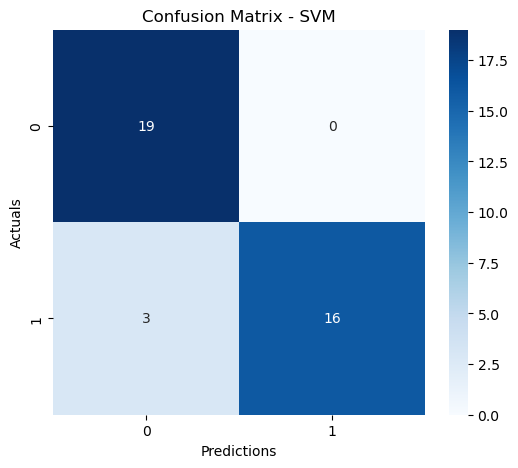

In [78]:
# Support Vector Machine (SVM) Model
svm_model = SVC(kernel='linear')  # Linear Kernel SVM
svm_model.fit(X_train_bin, y_train_bin)
y_pred_svm = svm_model.predict(X_test_bin)

# Metrics for SVM
svm_cm = confusion_matrix(y_test_bin, y_pred_svm)
svm_accuracy = accuracy_score(y_test_bin, y_pred_svm)
svm_precision = precision_score(y_test_bin, y_pred_svm)
svm_recall = recall_score(y_test_bin, y_pred_svm)
svm_f1 = f1_score(y_test_bin, y_pred_svm)

print(f"SVM Results:")
print(f"Accuracy: {svm_accuracy*100:.2f}%")
print(f"Precision: {svm_precision*100:.2f}%")
print(f"Recall: {svm_recall*100:.2f}%")
print(f"F1 Score: {svm_f1*100:.2f}%")
print("Confusion Matrix:")
print(svm_cm)

# Support Vector Machine (SVM) Plot
y_pred_svm = svm_model.predict(X_test_bin)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_bin, y_pred_svm, color='blue', alpha=0.5)
plt.xlabel("Actual Active Cases (Binary)")
plt.ylabel("Predicted Active Cases (Binary)")
plt.title("Actual vs Predicted Active Cases (SVM)")
plt.show()

# Plot Confusion Matrix for SVM
plt.figure(figsize=(6, 5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix - SVM')
plt.show()

DECISION TREE MODEL

Decision Tree Results:
Accuracy: 84.21%
Precision: 80.95%
Recall: 89.47%
F1 Score: 85.00%
Confusion Matrix:
[[15  4]
 [ 2 17]]


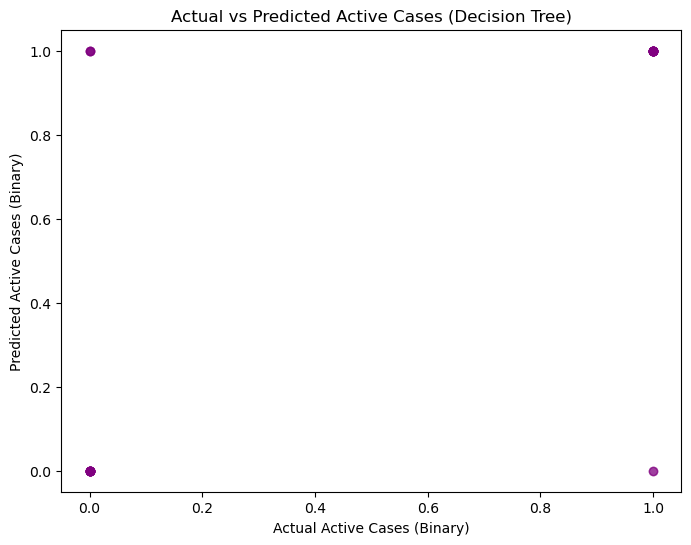

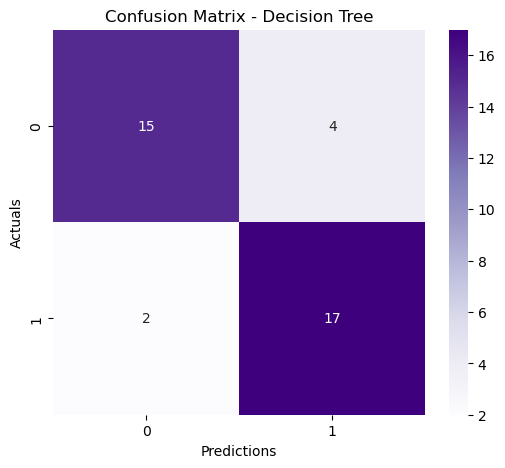

In [79]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)  # Decision Tree Classifier
dt_model.fit(X_train_bin, y_train_bin)
y_pred_dt = dt_model.predict(X_test_bin)

# Metrics for Decision Tree
dt_cm = confusion_matrix(y_test_bin, y_pred_dt)
dt_accuracy = accuracy_score(y_test_bin, y_pred_dt)
dt_precision = precision_score(y_test_bin, y_pred_dt)
dt_recall = recall_score(y_test_bin, y_pred_dt)
dt_f1 = f1_score(y_test_bin, y_pred_dt)

print(f"Decision Tree Results:")
print(f"Accuracy: {dt_accuracy*100:.2f}%")
print(f"Precision: {dt_precision*100:.2f}%")
print(f"Recall: {dt_recall*100:.2f}%")
print(f"F1 Score: {dt_f1*100:.2f}%")
print("Confusion Matrix:")
print(dt_cm)

# Decision Tree Plot
y_pred_dt = dt_model.predict(X_test_bin)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_bin, y_pred_dt, color='purple', alpha=0.5)
plt.xlabel("Actual Active Cases (Binary)")
plt.ylabel("Predicted Active Cases (Binary)")
plt.title("Actual vs Predicted Active Cases (Decision Tree)")
plt.show()

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 5))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Purples', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

RANDOM FOREST MODEL

Random Forest Results:
Accuracy: 86.84%
Precision: 85.00%
Recall: 89.47%
F1 Score: 87.18%
Confusion Matrix:
[[16  3]
 [ 2 17]]


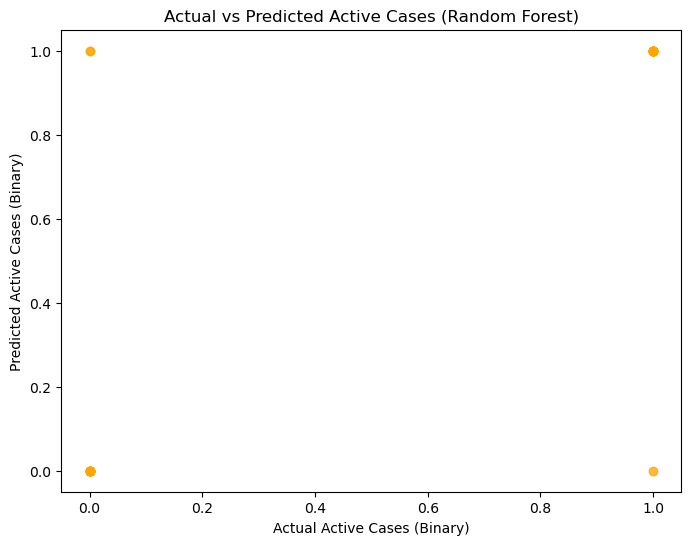

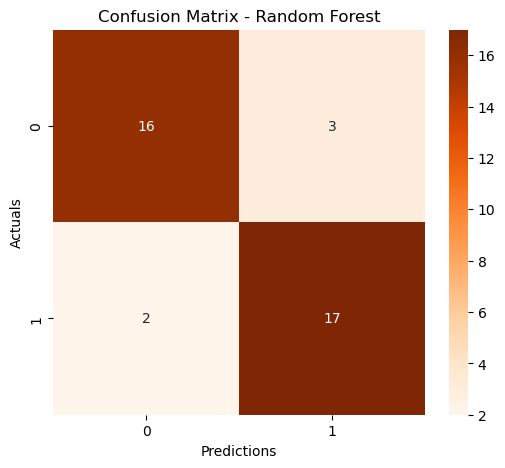

In [80]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bin, y_train_bin)
y_pred_rf = rf_model.predict(X_test_bin)

# Metrics for Random Forest
rf_cm = confusion_matrix(y_test_bin, y_pred_rf)
rf_accuracy = accuracy_score(y_test_bin, y_pred_rf)
rf_precision = precision_score(y_test_bin, y_pred_rf)
rf_recall = recall_score(y_test_bin, y_pred_rf)
rf_f1 = f1_score(y_test_bin, y_pred_rf)

print(f"Random Forest Results:")
print(f"Accuracy: {rf_accuracy*100:.2f}%")
print(f"Precision: {rf_precision*100:.2f}%")
print(f"Recall: {rf_recall*100:.2f}%")
print(f"F1 Score: {rf_f1*100:.2f}%")
print("Confusion Matrix:")
print(rf_cm)

# Random Forest Plot
y_pred_rf = rf_model.predict(X_test_bin)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_bin, y_pred_rf, color='Orange', alpha=0.5)
plt.xlabel("Actual Active Cases (Binary)")
plt.ylabel("Predicted Active Cases (Binary)")
plt.title("Actual vs Predicted Active Cases (Random Forest)")
plt.show()

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix - Random Forest')
plt.show()

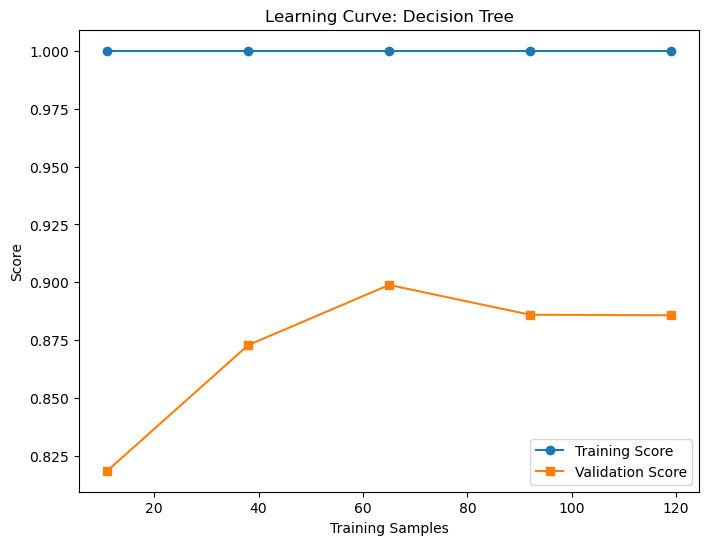

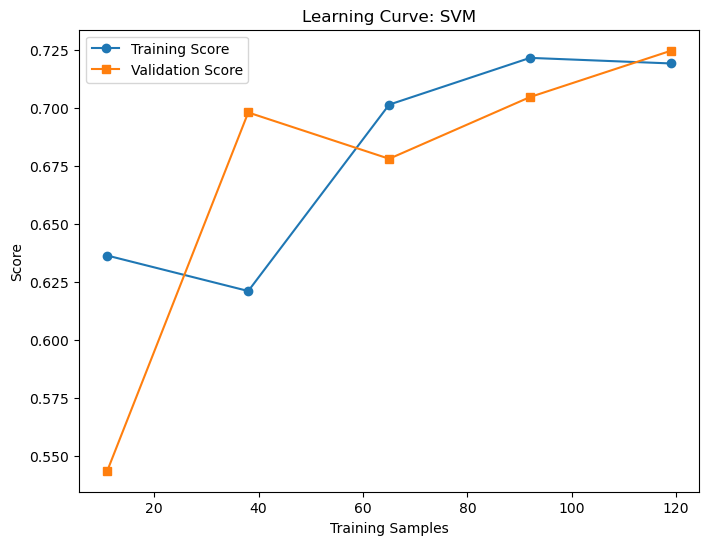

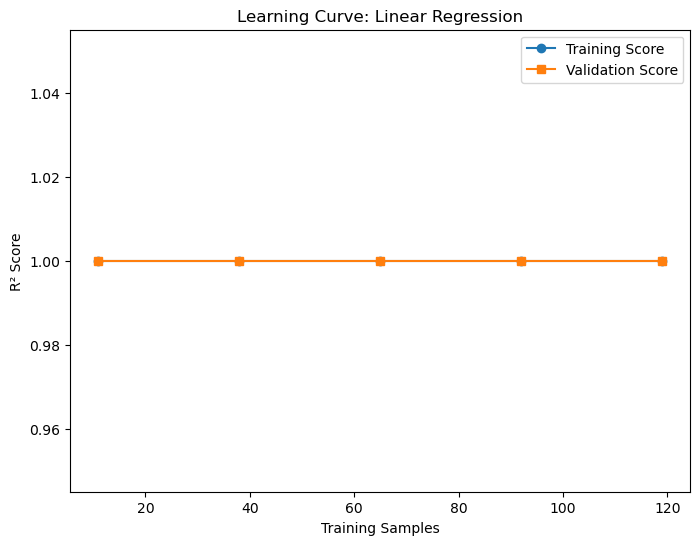

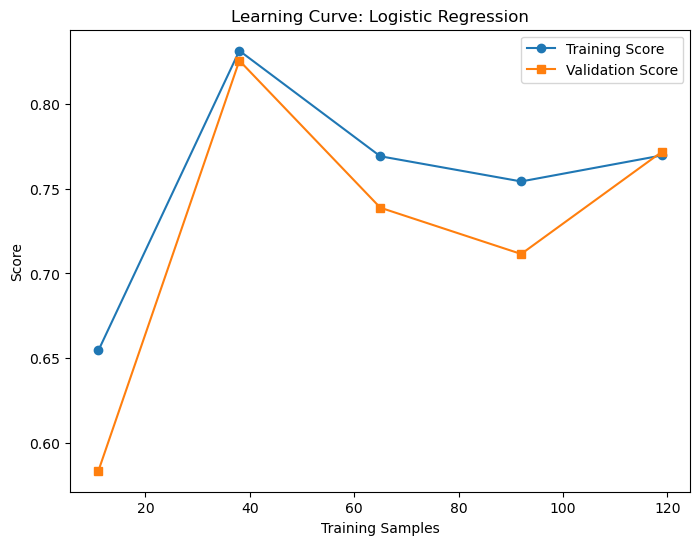

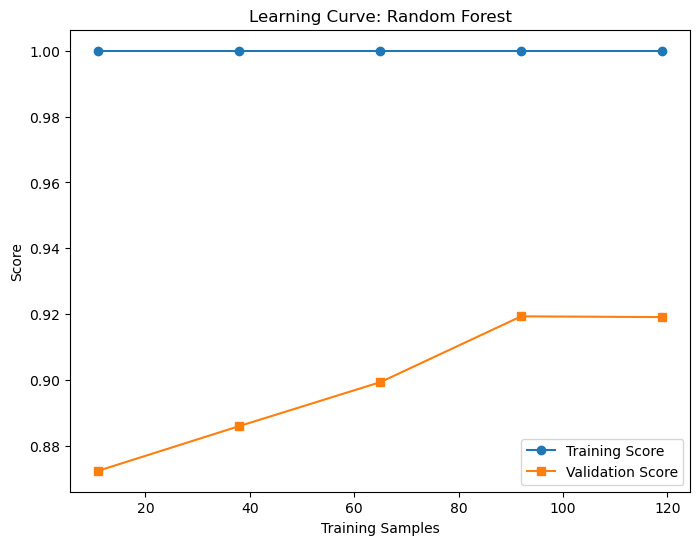

In [81]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, accuracy_score, r2_score

def plot_learning_curve(model, X, y, title):
    # Detect if the target (y) is continuous (Regression) or discrete (Classification)
    is_classification = len(set(y)) < 20  # Heuristic: If y has < 20 unique values, assume classification
    
    # Choose correct scoring metric
    scoring = 'accuracy' if is_classification else make_scorer(r2_score)
    
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring=scoring)
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
    plt.plot(train_sizes, test_mean, label='Validation Score', marker='s')
    plt.xlabel("Training Samples")
    plt.ylabel("Score" if is_classification else "R² Score")
    plt.title(f"Learning Curve: {title}")
    plt.legend()
    plt.show()

# Use the updated function
plot_learning_curve(dt_model, X_train_bin, y_train_bin, "Decision Tree")
plot_learning_curve(svm_model, X_train_bin, y_train_bin, "SVM")
plot_learning_curve(lin_model, X_train, y_train, "Linear Regression")  # Will now use R² Score
plot_learning_curve(LogisticRegression(max_iter=200), X_train_bin, y_train_bin, "Logistic Regression")
plot_learning_curve(RandomForestClassifier(), X_train_bin, y_train_bin, "Random Forest")
